In [6]:
import numpy as np
import pandas as pd
import os
import cv2
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# df=pd.read_csv("/kaggle/input/lumbar-spine-segmentation/dataset.csv")

In [8]:
# df.sample(3)

In [9]:
img_nil="/kaggle/input/lumbar-spine-segmentation/nii/images"
masks_nil="/kaggle/input/lumbar-spine-segmentation/nii/masks"
img_png="/kaggle/input/lumbar-spine-segmentation/png/images"
masks_png="/kaggle/input/lumbar-spine-segmentation/png/masks"

In [10]:
import os
import nibabel as nib
import numpy as np

new_img_nil = []
# img_nil_path = "path/to/your/img_nil"  # Replace with your actual path

for filename in os.listdir(img_nil):
    if filename.endswith('.nii'):
        file_path = os.path.join(img_nil, filename)
        if os.path.isfile(file_path):  # Check if it is a file
            img = nib.load(file_path)
            img_data = img.get_fdata()
            new_img_nil.append(img_data)

# Now `new_img_nil` contains the image data from all `.nii` files
# new_img_nil1=np.array(new_img_nil)
# Convert list to a NumPy array
new_img_nil_array = np.array(new_img_nil)

# Normalize the data (optional, depending on model requirements)
new_img_nil_array = (new_img_nil_array - np.min(new_img_nil_array)) / (np.max(new_img_nil_array) - np.min(new_img_nil_array))

# Check the shape of the first image
print(new_img_nil_array[0].shape)
# new_img_nil1[0]
data_reshaped_img_nii = np.expand_dims(new_img_nil_array, axis=-1)

print(data_reshaped_img_nii.shape)  
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

(39, 305, 305)
(23, 39, 305, 305, 1)


In [11]:
import os
import nibabel as nib
import numpy as np

new_masks_nil = []
# img_nil_path = "path/to/your/img_nil"  # Replace with your actual path

for filename in os.listdir(masks_nil):
    if filename.endswith('.nii'):
        file_path = os.path.join(masks_nil, filename)
        if os.path.isfile(file_path):  # Check if it is a file
            img = nib.load(file_path)
            img_data = img.get_fdata()
            new_masks_nil.append(img_data)

# Now `new_img_nil` contains the image data from all `.nii` files
# new_img_nil1=np.array(new_img_nil)
# Convert list to a NumPy array
new_masks_nil_array = np.array(new_masks_nil)

# Normalize the data (optional, depending on model requirements)
new_masks_nil_array = (new_masks_nil_array - np.min(new_masks_nil_array)) / (np.max(new_masks_nil_array) - np.min(new_masks_nil_array))

# Check the shape of the first image
print(new_masks_nil_array[0].shape)
# new_img_nil1[0]
data_reshaped_mask_nii = np.expand_dims(new_masks_nil_array, axis=-1)

print(data_reshaped_mask_nii.shape)  

(39, 305, 305)
(23, 39, 305, 305, 1)


In [12]:
import os
import nibabel as nib
import numpy as np

new_img_png = []
# img_nil_path = "path/to/your/img_nil"  # Replace with your actual path
for cur,dir,filename in os.walk(img_png):
    for file in filename:
#     if filename.endswith('.png'):
        file_path = os.path.join(cur, file)
        if os.path.isfile(file_path):  # Check if it is a file
            img = cv2.imread(file_path)
#             img_data = img.get_fdata()
            new_img_png.append(img)
# new_img_png.shape
# # Now `new_img_nil` contains the image data from all `.nii` files
new_img_png1=np.array(new_img_nil)
# # Convert list to a NumPy array
# print(new_img_png1.shape)
new_img_png_array = np.array(new_img_png1)
# print(new_img_png_array)
# Normalize the data (optional, depending on model requirements)
new_img_png_array = (new_img_png_array - np.min(new_img_png_array)) / (np.max(new_img_png_array) - np.min(new_img_png_array))

# Check the shape of the first image
print(new_img_png_array[0].shape)
# new_img_nil1[0]
data_reshaped_png = np.expand_dims(new_img_png_array, axis=-1)

print(data_reshaped_png.shape)  

(39, 305, 305)
(23, 39, 305, 305, 1)


In [13]:
new_masks_png = []
# img_nil_path = "path/to/your/img_nil"  # Replace with your actual path
for cur,dir,filename in os.walk(masks_png):
    for file in filename:
#     if filename.endswith('.png'):
        file_path = os.path.join(cur, file)
        if os.path.isfile(file_path):  # Check if it is a file
            img = cv2.imread(file_path)
#             img_data = img.get_fdata()
            new_masks_png.append(img)
# new_img_png.shape
# # Now `new_img_nil` contains the image data from all `.nii` files
new_masks_png1=np.array(new_masks_nil)
# # Convert list to a NumPy array
# print(new_masks_png1.shape)
new_masks_png_array = np.array(new_masks_png1)
# print(new_masks_png_array)
# Normalize the data (optional, depending on model requirements)
new_masks_png_array = (new_masks_png_array - np.min(new_masks_png_array)) / (np.max(new_masks_png_array) - np.min(new_masks_png_array))

# Check the shape of the first image
print(new_masks_png_array[0].shape)
# new_img_nil1[0]
data_reshaped_png_masks= np.expand_dims(new_masks_png_array, axis=-1)

print(data_reshaped_png_masks.shape)  

(39, 305, 305)
(23, 39, 305, 305, 1)


In [14]:
X=data_reshaped_img_nii+data_reshaped_png
Y=data_reshaped_mask_nii+data_reshaped_png_masks

In [15]:
print(X.shape)
print(X.size)
print(Y.shape)
print(Y.size)

(23, 39, 305, 305, 1)
83443425
(23, 39, 305, 305, 1)
83443425


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
X_train.shape

(18, 39, 305, 305, 1)

# # # ml

In [ ]:
import numpy as np
from tensorflow.keras.layers import UpSampling3D, Conv3D, MaxPooling3D, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer
model.add(Input(shape=(18, 39, 305, 305, 1)))

# Add a Conv3D layer
model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu'))

# Add an UpSampling3D layer
model.add(UpSampling3D(size=(2, 2, 2)))  # Upsample by a factor of 2 in each dimension

# Add another Conv3D layer after upsampling
model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu'))

# Add a MaxPooling3D layer to see the downsampling effect
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print model summary
model.summary()
model.fit(X_train,Y_train)

In [ ]:
from tensorflow.keras.layers import UpSampling3D, Conv3D, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer: (depth, height, width, channels)
model.add(Input(shape=(18, 39, 305, 305,1)))  # Ensure this matches your actual data

# Add a Conv3D layer
model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu'))

# Add an UpSampling3D layer
model.add(UpSampling3D(size=(2, 2, 2)))  # Upsample by a factor of 2 in each dimension

# Add another Conv3D layer after upsampling
model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print model summary
model.summary()
model.fit(X_train,Y_train)

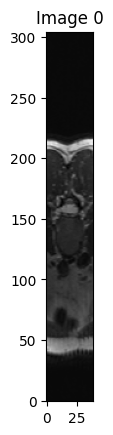

In [16]:
def plot_image_from_df(df, index):
    image_data = new_img_nil1[3]
    
    # Assuming the image is 3D, plot the middle slice
    middle_slice = image_data[:, :, image_data.shape[2] // 2]

    plt.imshow(middle_slice.T, cmap='gray', origin='lower')
    plt.title(f"Image {index}")
    plt.show()

# Plot the first image in the DataFrame
plot_image_from_df(df, 0)


In [ ]:
from tensorflow.keras.layers import UpSampling3D, Conv3D, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer: (depth, height, width, channels)
model.add(Input(shape=(39,305,305,1)))  # Adjust to your data's actual depth, height, width, and channels

# Add a Conv3D layer
model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu'))

# Add an UpSampling3D layer
model.add(UpSampling3D(size=(2, 2, 2)))  # Upsample by a factor of 2 in each dimension

# Add another Conv3D layer after upsampling
model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='sigmoid'))
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print model summary
model.summary()
model.fit(X_train,Y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, UpSampling3D

model = Sequential()

# Initial convolution layer
model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu', input_shape=(39, 305, 305, 1)))

# Up-sampling to match target dimensions
model.add(UpSampling3D(size=(2, 2, 2)))  # Adjust the size as needed
model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu'))

# Ensure the final layer matches the target shape
model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,Y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense

model = Sequential([
    Input(shape=(39, 305, 305, 1)),  # Replace with actual shape
    Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    # Add more layers as needed
    Flatten(),
    Dense(units=1)  # Adjust units to match your output shape
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, Y_train)


In [87]:
Y_train.shape

(18, 39, 305, 305, 1)

In [18]:
from sklearn.decomposition import PCA
n_features=39*305*305*1
print(n_features)
n_component = min(18,n_features)-1
dp=PCA(n_components=n_component,random_state=42)
# transform_X_train=dp.fit_transform(X_train)

3627975


In [19]:
# Flatten each sample
n_samples = X_train.shape[0]
n_features = np.prod(X_train.shape[1:])  # depth * height * width * channels
X_train_flattened = X_train.reshape(n_samples, n_features)

# Apply PCA
n_components = min(18, n_features) - 1
pca = PCA(n_components=n_components, random_state=42)
X_train_transformed = pca.fit_transform(X_train_flattened)

# Check the shape of the transformed data
print(f"Transformed shape: {X_train_transformed.shape}")

Transformed shape: (18, 17)


In [20]:
# Flatten each sample
n_samples = Y_train.shape[0]
n_features = np.prod(Y_train.shape[1:])  # depth * height * width * channels
Y_train_flattened = Y_train.reshape(n_samples, n_features)

# Apply PCA
n_components = min(18, n_features) - 1
pca = PCA(n_components=n_components, random_state=42)
Y_train_transformed = pca.fit_transform(Y_train_flattened)

# Check the shape of the transformed data
print(f"Transformed shape: {Y_train_transformed.shape}")

Transformed shape: (18, 17)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Reshape

model = Sequential([
    # Example layers, adjust as needed
    Conv3D(filters=3, kernel_size=(3, 3, 3), activation='relu', input_shape=(39, 305, 305, 1)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    # Add more layers as needed
    Flatten(),
    Dense(39 * 305 * 305 * 1, activation='sigmoid'),  # Example dense layer, adjust units and activation
    Reshape((39, 305, 305, 1))  # Reshape to match Y_train shape
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_transformed,Y_train_transformed)

2024-07-23 12:28:50.144242: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 12:28:50.144444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 12:28:50.347670: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from keras.layers import Conv3D, MaxPooling3D, Reshape, Input,Flatten,Dense
from keras.models import Model


# Example with reduced depth
input_shape = (39, 305, 305, 1)
inputs = Input(shape=input_shape)

# Perform dimensionality reduction
x = Conv3D(filters=16, kernel_size=(1, 1, 1), activation='relu')(inputs)  # Reducing depth
x = MaxPooling3D(pool_size=(2, 2, 2))(x)
x = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(x)
x = MaxPooling3D(pool_size=(2, 2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train_transformed,Y_train_transformed)

ValueError: Input 0 of layer "functional_3" is incompatible with the layer: expected shape=(None, 39, 305, 305, 1), found shape=(None, 17)

In [26]:
from keras.layers import Input, Dense
from keras.models import Model

input_shape = X_train.shape[1:]  # (height, width, channels)
n_features = np.prod(input_shape)
encoding_dim = 50  # Dimensionality of the encoded representation

# Define the autoencoder model
input_img = Input(shape=input_shape)
x = Flatten()(input_img)
x = Dense(encoding_dim, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(n_features, activation='relu')(encoded)
decoded = Reshape(input_shape)(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True)

# Encode the images
encoder = Model(input_img, encoded)
X_train_encoded = encoder.predict(X_train)
print(f"Encoded shape: {X_train_encoded.shape}")


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.5313e-08 - loss: 4.5994
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.5313e-08 - loss: 8.5463
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.5313e-08 - loss: 8.6160
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.5313e-08 - loss: 8.6194
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.5313e-08 - loss: 8.6212
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.5313e-08 - loss: 8.6223
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.5313e-08 - loss: 8.6250
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.5313e-08 - loss: 8.6264
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.5313e-08 - loss: 8.6284
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.5313e-08 - loss: 8.6307
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.5313e-08 - loss: 8.6329
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1

In [27]:
X_train.shape[0]

18

In [30]:
X_train.shape[1:]

(39, 305, 305, 1)